# Detecção de Fraude de Cartão de Crédito

## Contexto

A fraude de cartão de crédito é um problema abrangente para as instituições financeiras, envolvendo roubo e fraude cometidos com cartão de pagamento. Sendo assim, é importante que as empresas de cartão de crédito sejam capazes de reconhecer transações fraudulentas para que os clientes não sejam cobrados por itens que não compraram.

## Informações sobre o dataset

https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud

<img src="about_dataset.png">

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay, classification_report

In [2]:
df = pd.read_csv("card_transdata.csv")

# Exploratory Data Analisys

In [4]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [5]:
df.shape

(1000000, 8)

In [6]:
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [4]:
# Separando variáveis categóricas e numéricas
categorical = list()
numerical = list()

for i in df.columns.to_list():
    if len(df[i].value_counts()) > 2:
        numerical.append(i)
    else:
        categorical.append(i)

In [8]:
# Explorar mais estatísticas das variáveis numéricas
df.drop(columns=categorical, axis= 1).describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
count,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182
std,65.390784,25.843093,2.799589
min,0.004874,0.000118,0.004399
25%,3.878008,0.296671,0.475673
50%,9.967760,0.998650,0.997717
75%,25.743985,3.355748,2.096370
max,10632.723672,11851.104565,267.802942


In [55]:
# O quão diferem os valores médios por transação ?
df[numerical].join(df['fraud']).groupby('fraud').agg([np.mean, np.std]).T

fraud                                      0.0         1.0
distance_from_home             mean  22.832976   66.261876
                               std   52.828655  134.391608
distance_from_last_transaction mean   4.301391   12.712185
                               std   22.472359   47.997697
ratio_to_median_purchase_price mean   1.423642    6.006323
                               std    1.946152    5.564320

distance_from_home


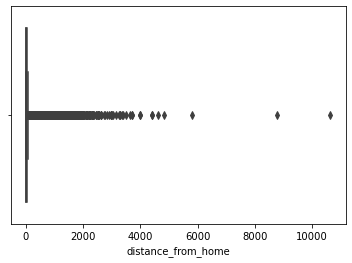

distance_from_last_transaction


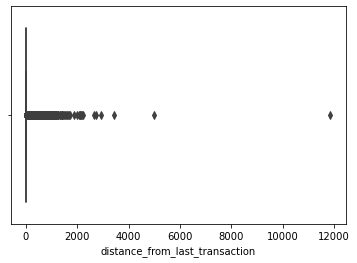

ratio_to_median_purchase_price


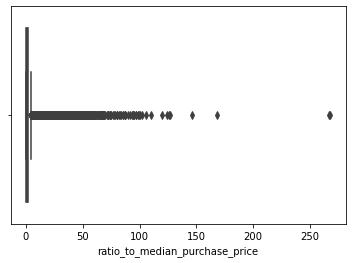

In [7]:
# Exibindo distribuição das variáveis numéricas
for i in numerical:
    print(i)
    sns.boxplot(data= df, x = i)
    plt.show()

In [10]:
# Estatísticas das variáveis categóricas
df.drop(columns=numerical, axis = 1).describe()

,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.881536,0.350399,0.100608,0.650552,0.087403
std,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


Coluna: repeat_retailer
Não: 11.85%
Sim: 88.15%


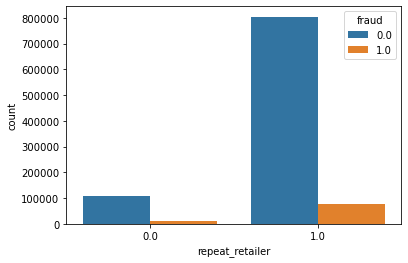

Coluna: used_chip
Não: 64.96%
Sim: 35.04%


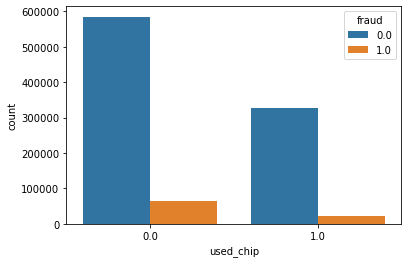

Coluna: used_pin_number
Não: 89.94%
Sim: 10.06%


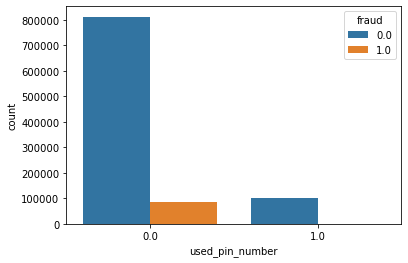

Coluna: online_order
Não: 34.94%
Sim: 65.06%


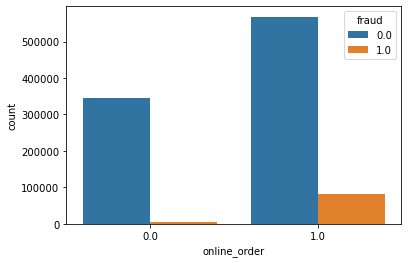

Coluna: fraud
Não: 91.26%
Sim: 8.74%


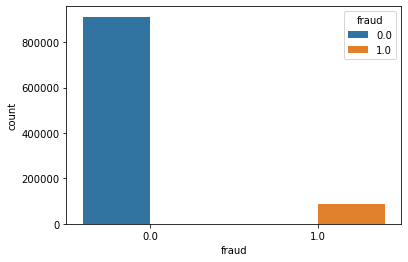

In [11]:
# Exibindo quantidade de fraude por variável categórica
for i in categorical:
    valores_1 = (len(df[i].loc[df[i] == 1]) / df.shape[0]) * 100
    valores_0 = 100 - valores_1
    print(f'Coluna: {i}\nNão: {round(valores_0, 2)}%\nSim: {round(valores_1, 2)}%')
    sns.countplot(data = df, x = i, hue = df['fraud'])
    plt.show()

# Cleaning data

In [12]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

# Preprocessing

In [12]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [18]:
df2 = df.copy()

In [19]:
# Separando os dados em previsores e alvo
x = df2.drop("fraud", axis = 1)
y = df2[['fraud']]

In [15]:
x.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0


In [16]:
y.head()

,fraud
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 1)

In [22]:
x_train.shape, y_train.shape

((750000, 7), (750000, 1))

In [23]:
# Normalizando os dados de treino e transformando os dados de teste
features = x_train.columns.to_list()
target = y_train.columns.to_list()

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

# Treinando os modelos

A avaliação do modelo é feita com uma matriz de confusão, que nos mostra a quantidade de erros e acertos do modelo.
* Recall --> Falso negativo, preveu erroneamente uma transação normal
* Precisão --> Falso positivo, preveu erroneamente uma transação fraudada
<div> <b> Valores maiores de Recall e Precisão indicam que o modelo comete poucos erros. </b></div>


## Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
nb = GaussianNB()
nb.fit(x_train, y_train.ravel())
nb_pred = nb.predict(x_test)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97    228077
         1.0       0.79      0.60      0.68     21923

    accuracy                           0.95    250000
   macro avg       0.88      0.79      0.83    250000
weighted avg       0.95      0.95      0.95    250000



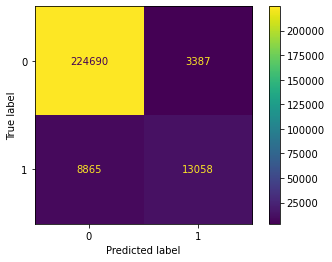

In [22]:
# Avaliando o modelo
print(classification_report(y_test, nb_pred))
matrix = confusion_matrix(y_test, nb_pred)
ConfusionMatrixDisplay(matrix).plot()
plt.show()

## SVM

In [23]:
from sklearn.svm import SVC, LinearSVC

In [24]:
svm = LinearSVC(random_state = 1)
svm.fit(x_train, y_train.ravel())
svm_pred = svm.predict(x_test)

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97    228077
         1.0       0.90      0.38      0.54     21923

    accuracy                           0.94    250000
   macro avg       0.92      0.69      0.75    250000
weighted avg       0.94      0.94      0.93    250000



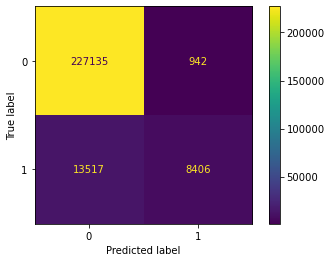

In [25]:
# Avaliando o modelo
print(classification_report(y_test, svm_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, svm_pred)).plot()
plt.show()

## Logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr = LogisticRegression(random_state=1, max_iter = 500)
lr.fit(x_train, y_train.ravel())
lr_pred = lr.predict(x_test)

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97    228077
         1.0       0.91      0.40      0.56     21923

    accuracy                           0.94    250000
   macro avg       0.93      0.70      0.76    250000
weighted avg       0.94      0.94      0.93    250000



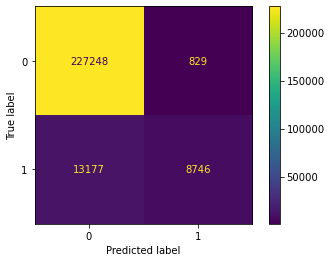

In [28]:
# Avaliando o modelo
print(classification_report(y_test, lr_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, lr_pred)).plot()
plt.show()

## KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train.ravel())
knn_pred = knn.predict(x_test)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    228077
         1.0       1.00      0.99      0.99     21923

    accuracy                           1.00    250000
   macro avg       1.00      1.00      1.00    250000
weighted avg       1.00      1.00      1.00    250000



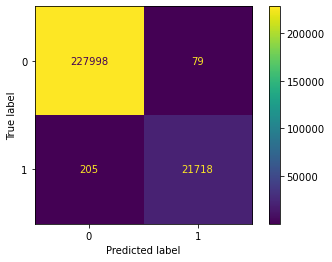

In [33]:
print(classification_report(y_test, knn_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, knn_pred)).plot()
plt.show()

## Desicion tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
dt.fit(x_train, y_train.ravel())
dt_pred = dt.predict(x_test)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    228077
         1.0       1.00      1.00      1.00     21923

    accuracy                           1.00    250000
   macro avg       1.00      1.00      1.00    250000
weighted avg       1.00      1.00      1.00    250000



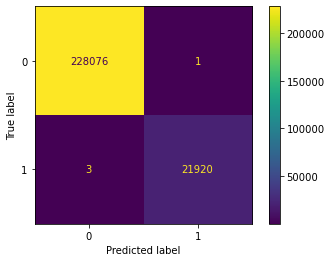

In [36]:
# Avaliando o modelo
print(classification_report(y_test, dt_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, dt_pred)).plot()
plt.show()

## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf = RandomForestClassifier(criterion = 'entropy' ,random_state = 1)
rf.fit(x_train, y_train.ravel())
rf_pred = rf.predict(x_test)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    228077
         1.0       1.00      1.00      1.00     21923

    accuracy                           1.00    250000
   macro avg       1.00      1.00      1.00    250000
weighted avg       1.00      1.00      1.00    250000



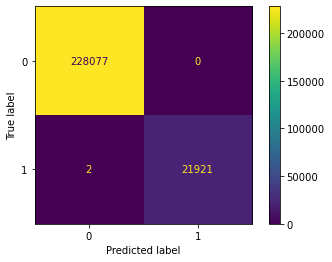

In [39]:
# Avaliando o modelo
print(classification_report(y_test, rf_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, rf_pred)).plot()
plt.show()

## Extreme Gradient Boosting (XGBoost)

In [34]:
# pip install xgboost

In [40]:
from xgboost import XGBClassifier

In [41]:
xgb = XGBClassifier(random_state = 1)
xgb.fit(x_train, y_train.ravel())
xgb_pred = xgb.predict(x_test)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    228077
         1.0       1.00      1.00      1.00     21923

    accuracy                           1.00    250000
   macro avg       1.00      1.00      1.00    250000
weighted avg       1.00      1.00      1.00    250000



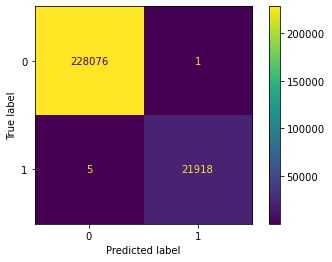

In [42]:
print(classification_report(y_test, xgb_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, xgb_pred)).plot()
plt.show()

## Light Gradient Boosting Machine (Light GBM)

In [43]:
from lightgbm import LGBMClassifier

In [44]:
lgbm = LGBMClassifier(random_state = 1)
lgbm.fit(x_train, y_train.ravel())
lgbm_pred = lgbm.predict(x_test)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    228077
         1.0       0.99      0.99      0.99     21923

    accuracy                           1.00    250000
   macro avg       0.99      0.99      0.99    250000
weighted avg       1.00      1.00      1.00    250000



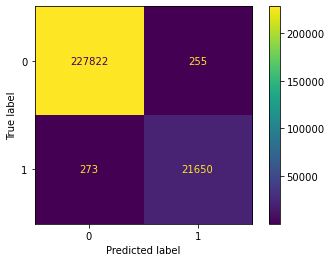

In [45]:
print(classification_report(y_test, lgbm_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, lgbm_pred)).plot()
plt.show()

## Cat Boost

In [56]:
# pip install catboost

In [46]:
from catboost import CatBoostClassifier

In [53]:
cb = CatBoostClassifier(random_state = 1, iterations = 200)
cb.fit(x_train, y_train)
cb_pred = cb.predict(x_test)


Learning rate set to 0.5
0:	learn: 0.0409534	total: 136ms	remaining: 40.5s
1:	learn: 0.0166195	total: 264ms	remaining: 39.3s
2:	learn: 0.0086537	total: 612ms	remaining: 1m
3:	learn: 0.0043588	total: 977ms	remaining: 1m 12s
4:	learn: 0.0039370	total: 1.47s	remaining: 1m 26s
5:	learn: 0.0034766	total: 1.9s	remaining: 1m 33s
6:	learn: 0.0032827	total: 2.21s	remaining: 1m 32s
7:	learn: 0.0031894	total: 2.45s	remaining: 1m 29s
8:	learn: 0.0031335	total: 2.99s	remaining: 1m 36s
9:	learn: 0.0030973	total: 3.2s	remaining: 1m 32s
10:	learn: 0.0030607	total: 3.51s	remaining: 1m 32s
11:	learn: 0.0030397	total: 3.71s	remaining: 1m 29s
12:	learn: 0.0030302	total: 4.04s	remaining: 1m 29s
13:	learn: 0.0030008	total: 4.18s	remaining: 1m 25s
14:	learn: 0.0029651	total: 4.41s	remaining: 1m 23s
15:	learn: 0.0029540	total: 4.62s	remaining: 1m 21s
16:	learn: 0.0029246	total: 4.85s	remaining: 1m 20s
17:	learn: 0.0029020	total: 5.16s	remaining: 1m 20s
18:	learn: 0.0028880	total: 5.44s	remaining: 1m 20s
19:	l

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    228077
         1.0       0.99      0.99      0.99     21923

    accuracy                           1.00    250000
   macro avg       1.00      0.99      1.00    250000
weighted avg       1.00      1.00      1.00    250000



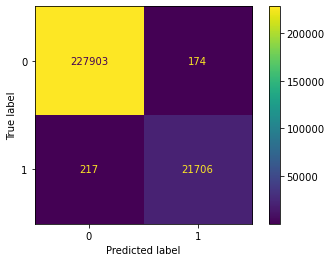

In [54]:
print(classification_report(y_test, cb_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, cb_pred)).plot()
plt.show()

## Observações

Melhores modelos:
* Decision tree 
* Random Forest
<p> Ambos com praticamente 100% de acertos em Recall e Precisão</p>

DecisionTreeClassifier(criterion='entropy', random_state=1)
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    228077
         1.0       1.00      1.00      1.00     21923

    accuracy                           1.00    250000
   macro avg       1.00      1.00      1.00    250000
weighted avg       1.00      1.00      1.00    250000



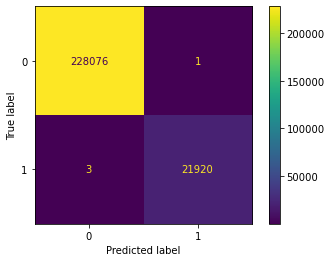

In [50]:
print(dt)
print(classification_report(y_test, dt_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, dt_pred)).plot()
plt.show()

RandomForestClassifier(criterion='entropy', random_state=1)
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    228077
         1.0       1.00      1.00      1.00     21923

    accuracy                           1.00    250000
   macro avg       1.00      1.00      1.00    250000
weighted avg       1.00      1.00      1.00    250000



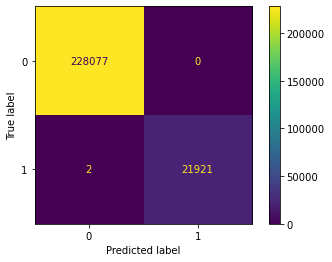

In [52]:
print(rf)
print(classification_report(y_test, rf_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, rf_pred)).plot()
plt.show()